# Introduction to Data Science - Homework 7
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 9, 11:59pm.

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

## Your Data
First Name: Brooke
<br>
Last Name: Stanislawski
<br>
E-mail: brooke.stanislawski@utah.edu
<br>
UID: u1142223
<br>

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.1506521

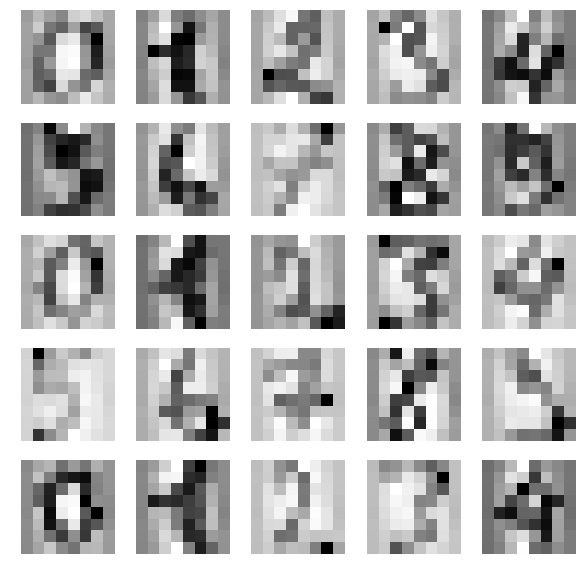

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [5]:
# your solution goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3) # test_size=0.8 doesn't make sense

dig_svm = svm.SVC(kernel='rbf',C=100)
dig_svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = dig_svm.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  1  0  0  0  0  0]
 [ 0  0 47  0  1  0  0  1  0  0]
 [ 0  0  2 62  0  0  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  1]
 [ 0  0  0  1  1  0  0  0 44  0]
 [ 0  0  0  0  0  1  1  0  0 55]]
Accuracy =  0.97962962963


[387 400]


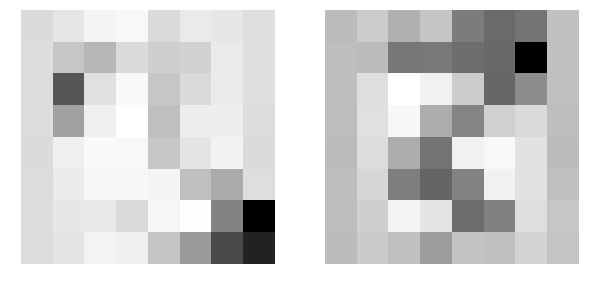

In [7]:
# Task 1.1.4 print misclassified digits as images: 2 images misclassified as 2, when they were 3 in reality
inds = np.intersect1d(np.where(y_test==3),np.where(y_pred==2))
print(inds)

for ii,ind in enumerate(inds):
    plt.subplot(1, 2, ii+1)
    plt.imshow(np.reshape(X_test[ind,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
    
plt.show()       


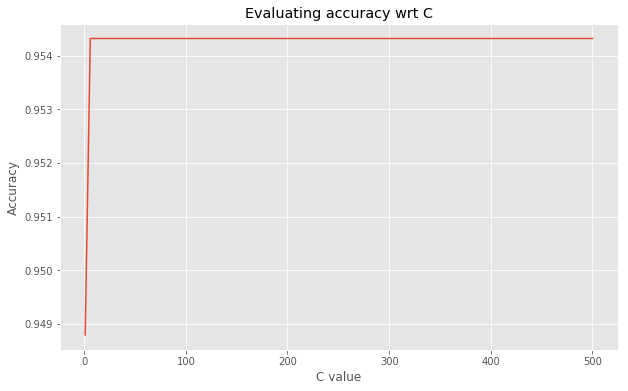

In [8]:
#%% Task 1.1.5 
dig_svm.get_params()

Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    dig_svm = svm.SVC(kernel='rbf', C = C)
    scores = cross_val_score(estimator = dig_svm, X = X, y = y, cv=5, scoring='accuracy')
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.title('Evaluating accuracy wrt C')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.show()

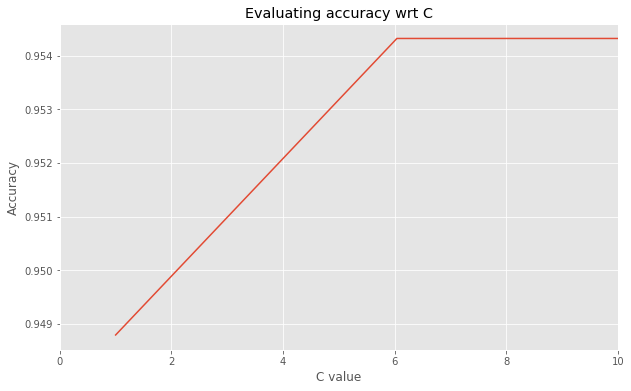

In [9]:
plt.plot(Cs,Accuracies)
plt.title('Evaluating accuracy wrt C')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xlim(0,10)
plt.show()

In [10]:
#%% Task 1.1.6

Xraw = digits.data
X_train, X_test, y_train, y_test = train_test_split(Xraw, y, random_state=1, test_size=0.3)

rawdig_svm = svm.SVC(kernel='rbf',C=100)
rawdig_svm.fit(X_train, y_train)

y_pred = rawdig_svm.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[31  0  0  0  0 28  0  0  0  0]
 [ 0 19  0  0  0 30  0  0  0  0]
 [ 0  0 22  0  0 27  0  0  0  0]
 [ 0  0  0 12  0 52  0  0  0  0]
 [ 0  0  0  0 19 42  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0 18 33  0  0  0]
 [ 0  0  0  0  0 35  0 22  0  0]
 [ 0  0  0  0  0 36  0  0 10  0]
 [ 0  0  0  0  0 51  0  0  0  6]]
Accuracy =  0.409259259259


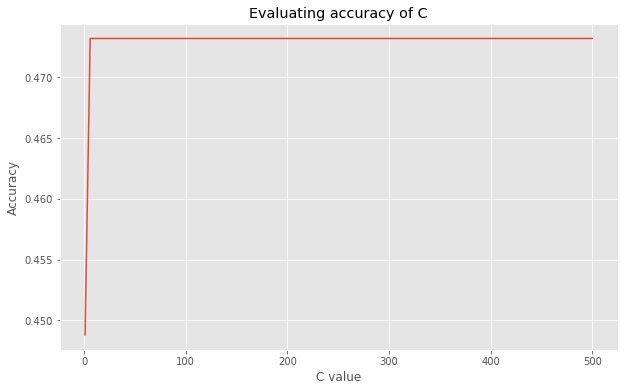

In [11]:
rawdig_svm.get_params()

Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    rawdig_svm = svm.SVC(kernel='rbf', C = C)
    scores = cross_val_score(estimator = rawdig_svm, X = Xraw, y = y, cv=5, scoring='accuracy') 
    Accuracies[i]  = scores.mean()
    
plt.plot(Cs,Accuracies)
plt.title('Evaluating accuracy of C')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.show()

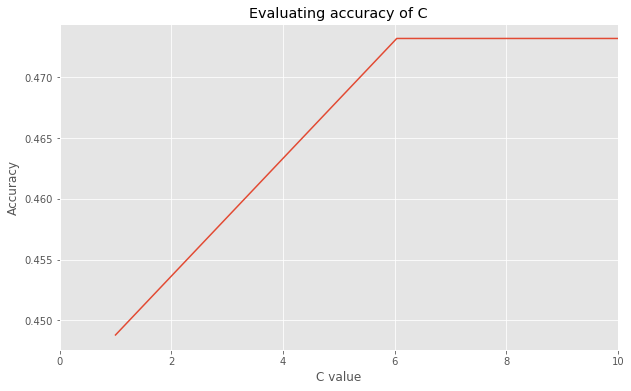

In [12]:
plt.plot(Cs,Accuracies)
plt.title('Evaluating accuracy of C')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xlim(0,10) # change this to 0, 10
plt.show()

**Your Interpretation**: Using the test dataset and with a test_size of 0.3, the model's accuracy is ~98%, meaning that 98% of the images were classified correctly.  As seen in the confusion matrix, the most common mistake made by the model is incorrectly classifying 2 digits as '2' when they were actually a '3', which it did in two cases.

In Task 1.1.5, we evaluate accuracies of the SVM model and found that any C greater than or equal to 6 results in a constant maximum accuracy of 95.4% using cross validation.

In Task 1.1.6, using the raw, unscaled data yielded an accuracy of 0.41, which is significantly lower than the model using the scaled data.  The model misclassified 52 images as '5' when they were actually '3'.  Interestingly, this model had the most trouble with handwritten images of the digit '5'.

Evaluating several different values of C for the model on raw data, the plot shows that any C greater than or equal to 6 should yield a cross-validation accuracy of ~0.475.

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 3, find the best value of k. 

In [13]:
# your solution goes here

k = 10
X = scale(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  1  0  0  0  0]
 [ 0  0 48  0  0  0  0  1  0  0]
 [ 0  0  1 61  0  0  0  1  1  0]
 [ 0  1  0  0 59  0  0  1  0  0]
 [ 0  1  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  1]
 [ 0  2  1  0  0  0  0  0 43  0]
 [ 0  0  0  1  0  2  1  1  0 52]]
Accuracy =  0.966666666667


[347 523]


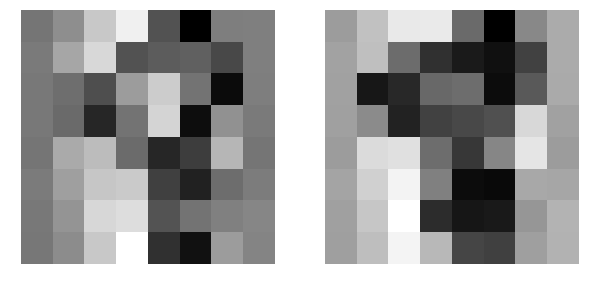

[515 537]


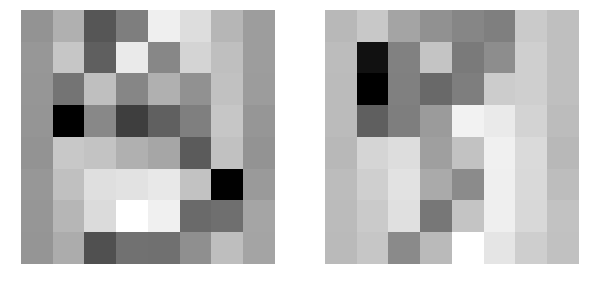

In [14]:
#%% Task 1.2.4 print misclassified digits as images
inds = np.intersect1d(np.where(y_test==8),np.where(y_pred==1))
print(inds)

for ii,ind in enumerate(inds):
    plt.subplot(1, 2, ii+1)
    plt.imshow(np.reshape(X_test[ind,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
    
plt.show()   

inds = np.intersect1d(np.where(y_test==9),np.where(y_pred==5))
print(inds)

for ii,ind in enumerate(inds):
    plt.subplot(1, 2, ii+1)
    plt.imshow(np.reshape(X_test[ind,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
    
plt.show()  

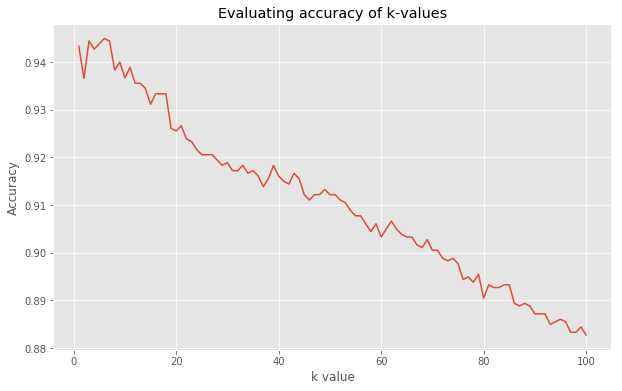

In [15]:
#%% Task 1.2.5 

knn_model.get_params()

Ks = np.linspace(1,100,100)
Accuracies = np.zeros(Ks.shape[0])
for i,k in enumerate(Ks):
    knn_model = KNeighborsClassifier(n_neighbors=int(k))
    scores = cross_val_score(estimator = knn_model, X = X, y = y, cv=5, scoring='accuracy')
    Accuracies[i]  = scores.mean()

plt.plot(Ks,Accuracies)
plt.title('Evaluating accuracy of k-values')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

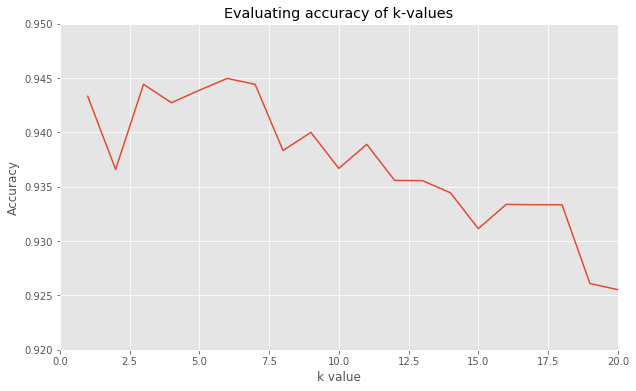

In [16]:
plt.plot(Ks,Accuracies)
plt.title('Evaluating accuracy of k-values')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.xlim(0,20)
plt.ylim(0.92,0.95)
plt.show()

In [17]:
# using k = 6
k = 6
X = scale(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  1  0  0  0  0]
 [ 0  0 48  0  0  0  0  1  0  0]
 [ 0  0  1 63  0  0  0  0  0  0]
 [ 0  1  0  0 59  0  0  1  0  0]
 [ 0  1  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  1]
 [ 0  3  0  1  0  0  0  0 42  0]
 [ 0  0  0  0  0  1  1  0  0 55]]
Accuracy =  0.974074074074


In [18]:
#%% Task 1.2.6 raw data
k = 6

Xraw = digits.data
X_train, X_test, y_train, y_test = train_test_split(Xraw, y, random_state=1, test_size=0.3)

rawdig_knn = KNeighborsClassifier(n_neighbors=k)
rawdig_knn.fit(X_train, y_train)

y_pred = rawdig_knn.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[58  0  0  0  1  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  1  0  0]
 [ 0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0]
 [ 0  2  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  0 56]]
Accuracy =  0.988888888889


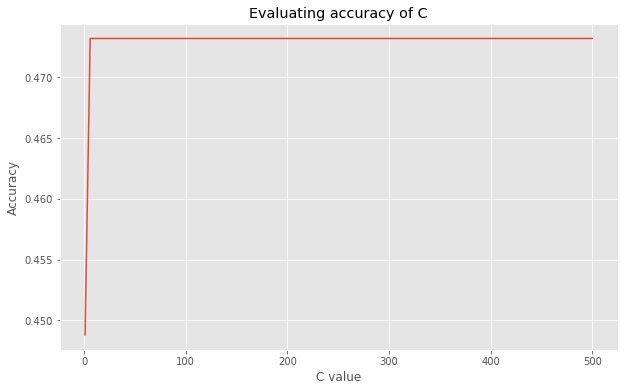

In [19]:
rawdig_knn.get_params()

Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    rawdig_knn = svm.SVC(kernel='rbf', C = C)
    scores = cross_val_score(estimator = rawdig_knn, X = Xraw, y = y, cv=5, scoring='accuracy')
    Accuracies[i]  = scores.mean()
    
plt.plot(Cs,Accuracies)
plt.title('Evaluating accuracy of C')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.show()


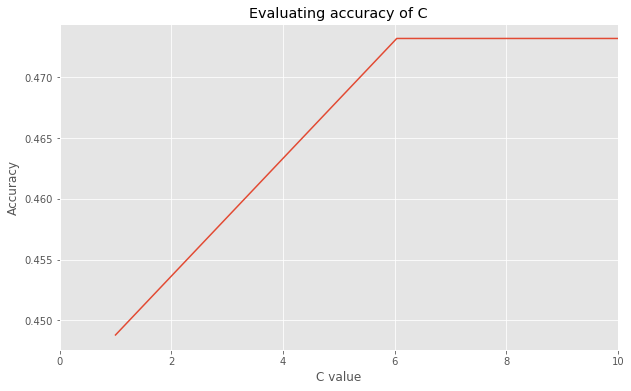

In [20]:
plt.plot(Cs,Accuracies)
plt.title('Evaluating accuracy of C')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xlim(0,10) # change this to 0, 10
plt.show()

**Your Interpretation**: Using k-NN with a test_size of 0.3, we see an accuracy of 0.97, which is almost as good as the SVM accuracy of 0.98 in Task 1.1.  The most common mistake, which is seen in the Confusion Matrix, is that the model mis-classified 2 data points as Class 1 when they were actually class 8 and 2 more data points as class 5 when they were actually class 9.

In Task 1.2.5, the variations of k show that there are two k-values that would yield high accuracy values including k = 3 and k = 6, using cross-validation.  At k-values greater than 10, accuracy decreases steadily. Using k = 6, our accuracy of the k-NN model increased marginally from 0.966667 to 0.974.

In Task 1.6.6, we use the raw data.  Using k = 6, we get an accuracy of 0.988889, which is incredible.  Evidently, the k-NN model does very well on unscaled data.

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [21]:
# Your code here
newsdf = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
newsdf.columns = newsdf.columns.str.replace(" ","") # get rid of extra spaces in attribute names (headers)
newsdf.head()

# please see end of Task 2.2 for creation of X and y arrays - I wanted to do this after cleaning 
# the data in Task 2.2

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [22]:
print('News dataframe shape: ',newsdf.shape,'\n')
print('Data types: \n',newsdf.dtypes)

News dataframe shape:  (39644, 61) 

Data types: 
 url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max

In [23]:
newsdf.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [24]:
newsdf.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [25]:
# looks like the maximum values of n_unique_tokens, n_non_stop_words, and n_non_stop_unique_tokens are not reasonable
newsdf.loc[newsdf['n_unique_tokens'] == 701.0] # which article is this? #index 31037 ukraine civilians...
# this entry also includes the maximum values of n_non_stop_words and n_non_stop_unique_tokens
newsdf = newsdf[newsdf['n_unique_tokens'] != 701.0] #remove this entry
newsdf.describe() # better

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,...,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000
mean,354.535832,10.398784,546.488914,0.530547,0.970209,0.672796,10.883687,3.293469,4.542971,1.249905,...,0.095448,0.756747,-0.259531,-0.521957,-0.107503,0.282360,0.071427,0.341851,0.156068,3395.317004
std,214.163808,2.114052,471.085404,0.137112,0.170012,0.154035,11.332160,3.855043,8.306262,4.107902,...,0.071314,0.247760,0.127721,0.290281,0.095373,0.324248,0.265453,0.188785,0.226296,11627.090592
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470867,1.000000,0.625733,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328384,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539216,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754624,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [26]:
print('Cleaned news dataframe shape: ',newsdf.shape,'\n')

Cleaned news dataframe shape:  (39643, 61) 



In [27]:
print('Shares Statistical info')
print(newsdf['shares'].describe())

Shares Statistical info
count     39643.000000
mean       3395.317004
std       11627.090592
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


In [28]:
newsdf['shares'].median()

1400.0

In [29]:
# From Task 2.1 part 3
# export predictor vars as np array
X = newsdf.drop(['url','timedelta','shares'],axis=1).as_matrix()
shares = newsdf['shares'].as_matrix()
y = [1 if x > newsdf['shares'].median() else 0 for x in shares] #binary numpy array, y, which indicates whether or not each article is popular

print('Predictor Variable Data Shape: ',X.shape)
print('Shares array length: ',len(y))

Predictor Variable Data Shape:  (39643, 58)
Shares array length:  39643


Minimum number of shares: 1 <br>
Median number of shares: 1,400 <br>
Maximum number of shares: 843,300 <br>

### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [30]:
k = 10 #arbitrary choice of k

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
news_knn = KNeighborsClassifier(n_neighbors=k)
news_knn.fit(X_train, y_train)

y_pred = news_knn.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[4166 1774]
 [3397 2556]]
Accuracy =  0.565206423947


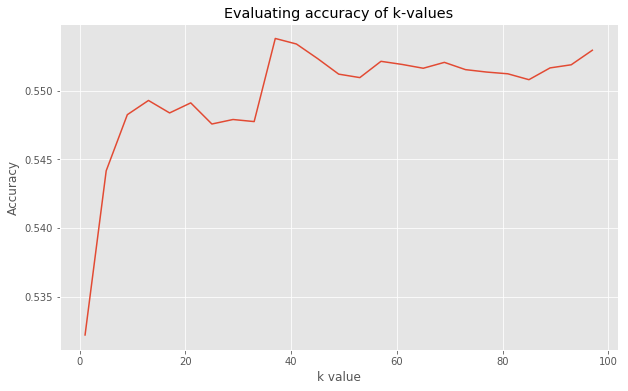

In [31]:
# Your code here
news_knn.get_params()

Ks = np.arange(1,100,4)
Accuracies = np.zeros(Ks.shape[0])
for i,k in enumerate(Ks):
    news_knn = KNeighborsClassifier(n_neighbors=int(k))
    scores = cross_val_score(estimator = news_knn, X = X, y = y, cv=5, scoring='accuracy') 
    Accuracies[i]  = scores.mean()
    
plt.plot(Ks,Accuracies)
plt.title('Evaluating accuracy of k-values')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

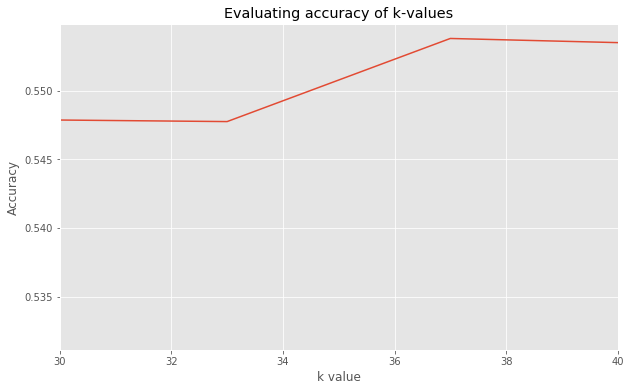

In [32]:
plt.plot(Ks,Accuracies)
plt.title('Evaluating accuracy of k-values')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.xlim(30,40) ################ CHECK THIS AND K VALUE
plt.show()

In [33]:
k = 37 # based on cross-validation

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
news_knn = KNeighborsClassifier(n_neighbors=k)
news_knn.fit(X_train, y_train)

y_pred = news_knn.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[3784 2156]
 [2835 3118]]
Accuracy =  0.580341377281


**Interpretation:** 
Maximum accuracy achieved: 0.5803

Explanation:
At the start, I arbitrarily chose k = 10, which yielded an accuracy of 0.565, which is not too impressive.  I evaluated the accuracy at 100 k-values between 1 and 100, which illustrated that the k-value of 37 yielded the maximum cross-validation accuracy of 0.564.  When I ran the k-NN model using k = 37, the accuracy was 0.5803.

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experimt with different Cs. Which is the best value for C?

Note that it takes multiple minutes to run on the whole dataset.

In [34]:
# Your code here
Xsubset = X[:5000][:]
ysubset = y[:5000]

X_train, X_test, y_train, y_test = train_test_split(Xsubset, ysubset, random_state=1, test_size=0.3)

news_svm = svm.SVC(kernel='rbf',C=100)
news_svm.fit(X_train, y_train)

y_pred = news_svm.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[  3 679]
 [  2 816]]
Accuracy =  0.546


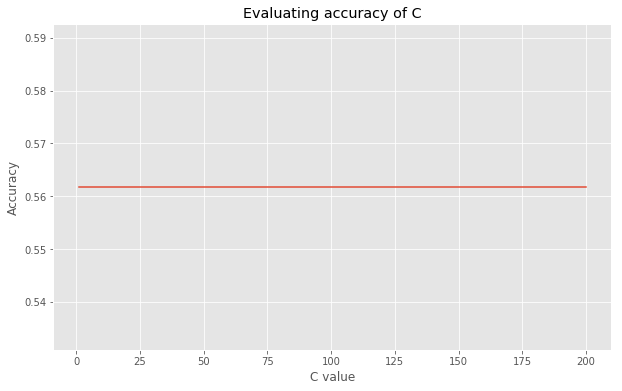

In [35]:
news_svm.get_params()

Cs = np.linspace(1,200,10)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    news_svm = svm.SVC(kernel='rbf', C = C)
    scores = cross_val_score(estimator = news_svm, X = Xsubset, y = ysubset, cv=5, scoring='accuracy')     # cv = 5 ??
    Accuracies[i]  = scores.mean()

plt.plot(Cs,Accuracies)
plt.title('Evaluating accuracy of C')
plt.xlabel('C value')
plt.ylabel('Accuracy')
#plt.xlim(0,10)
plt.show()


In [36]:
# now run model on entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

news_svm = svm.SVC(kernel='rbf',C=100)
news_svm.fit(X_train, y_train)

y_pred = news_svm.predict(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[5938    2]
 [5953    0]]
Accuracy =  0.49928529387


### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [41]:
# Your code here

decisionTree = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=10)
decisionTree = decisionTree.fit(X_train, y_train)

y_pred_train = decisionTree.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = decisionTree.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  0.715603603604
Accuracy on test data=  0.644496762802


In [39]:
# Your code here
def splitData(features):
    news_predictors = X # titanic[features].as_matrix()
    news_labels = y # titanic["Survived"].as_matrix()

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(news_predictors, news_labels, random_state=1, test_size=0.3)
    return XTrain, XTest, yTrain, yTest

In [40]:
all_features = list(newsdf)[2:60]
XTrain, XTest, yTrain, yTest = splitData(all_features)

min_ss = np.arange(3,450,20)
max_depths = np.arange(3,58,5) # maximum depth = number of features/variables
accuracies = []
for ss in min_ss: 
    for depth in max_depths:
        decisionTree = tree.DecisionTreeClassifier(min_samples_split=ss,max_depth=depth)
        y_pred = cross_val_predict(estimator = decisionTree, X = Xsubset, y = ysubset, cv=5) #change Xsubset to X
        accuracy = metrics.accuracy_score(y_true = ysubset, y_pred = y_pred)
        accuracies.append(accuracy)
        print('min sample split: '+str(ss)+', max_depth: '+str(depth)+', accuracy: '+str(accuracy))
        
print('max accuracy = '+str(max(accuracies)))


min sample split: 3, max_depth: 3, accuracy: 0.5746
min sample split: 3, max_depth: 8, accuracy: 0.571
min sample split: 3, max_depth: 13, accuracy: 0.5514
min sample split: 3, max_depth: 18, accuracy: 0.5444
min sample split: 3, max_depth: 23, accuracy: 0.551
min sample split: 3, max_depth: 28, accuracy: 0.5516
min sample split: 3, max_depth: 33, accuracy: 0.5432
min sample split: 3, max_depth: 38, accuracy: 0.5512
min sample split: 3, max_depth: 43, accuracy: 0.5504
min sample split: 3, max_depth: 48, accuracy: 0.542
min sample split: 3, max_depth: 53, accuracy: 0.5422
min sample split: 23, max_depth: 3, accuracy: 0.5746
min sample split: 23, max_depth: 8, accuracy: 0.5728
min sample split: 23, max_depth: 13, accuracy: 0.5524
min sample split: 23, max_depth: 18, accuracy: 0.5526
min sample split: 23, max_depth: 23, accuracy: 0.5594
min sample split: 23, max_depth: 28, accuracy: 0.554
min sample split: 23, max_depth: 33, accuracy: 0.5552
min sample split: 23, max_depth: 38, accuracy: 

min sample split: 263, max_depth: 48, accuracy: 0.5816
min sample split: 263, max_depth: 53, accuracy: 0.5816
min sample split: 283, max_depth: 3, accuracy: 0.5748
min sample split: 283, max_depth: 8, accuracy: 0.5838
min sample split: 283, max_depth: 13, accuracy: 0.5812
min sample split: 283, max_depth: 18, accuracy: 0.5768
min sample split: 283, max_depth: 23, accuracy: 0.577
min sample split: 283, max_depth: 28, accuracy: 0.5774
min sample split: 283, max_depth: 33, accuracy: 0.5774
min sample split: 283, max_depth: 38, accuracy: 0.5774
min sample split: 283, max_depth: 43, accuracy: 0.5774
min sample split: 283, max_depth: 48, accuracy: 0.5774
min sample split: 283, max_depth: 53, accuracy: 0.5774
min sample split: 303, max_depth: 3, accuracy: 0.5748
min sample split: 303, max_depth: 8, accuracy: 0.5858
min sample split: 303, max_depth: 13, accuracy: 0.5846
min sample split: 303, max_depth: 18, accuracy: 0.5802
min sample split: 303, max_depth: 23, accuracy: 0.5804
min sample spli

In [42]:
#%% run model again w/ optimized parameters

decisionTree = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=403) #parameters determined by loop above
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data=  0.660936936937
Accuracy on test data=  0.650634827209


### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best? <br>
+ How did different parameters influence the accuracy? <br>
+ Which model is easiest to interpret?
+ How would you interpret your results?


**Your Solution:**
1. The decision tree performed the best, with a 1% increase over the poorly performing SVN model.<br>
    k-NN max accuracy = 0.5803 <br>
    SVM max accuracy = 0.499 <br>
    Decision Tree max accuracy = 0.6506 <br>
+ k-NN: k strongly influenced cross-validation accuracy ranging from 0.53 to 0.56 <br>
    SVM: model accuracy was constant and did not depend on C, which is computationally expensive to determine <br>
    Decision Tree: As Min_sample_splits increased, so did cross-val accuracy, up to a min_sample_split value of 400.  Max_depths didn't have a strong impact. <br>
+ The k-NN and decision tree models are easiest to intepret primarily because they can be easily visualized. <br>
+ The Decision Tree model performed the best at an accuracy of 0.6506, however, this is still not a high accuracy value that would give me confidence in using the model to predict with new data.
    

** Reference Solution:** 

1. Decision trees work the best was better than KNN
+ Parameters
    + For decision trees, higher splits had a positive effect, topping out at about 400.
    + For SVM, C didn't have a noticable effect. It performed poorly anyways and takes very long.
    + For k-NN a k of 50 perfomed best.
+ k-NN and decision trees are easy to interpret.
+ The accuracy of predicting popularity of newspaper articles using just those features is not very high; a chance pick would have an accuracy of 0.5.